# The Best Team 
### Team Members
Fangshu

In [2]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Read in data frokm Mohit's folder

In [137]:
# Check files in folder
! ls /scratch/share/mohitsharma44/cusp-hack-17

Datasets.zip
LAS
posn-2017-01.csv
sonycnode-b827eb0d8af7.sonyc-2017-01.csv
sonycnode-b827eb0d8af7.sonyc-posn-2017-01.csv
sonycnode-b827eb2a1bce.sonyc-2017-01.csv
sonycnode-b827eb2a1bce.sonyc-posn-2017-01.csv
sonycnode-b827eb2a1bce.sonyc-spl-2017-01.csv
sonycnode-b827eb3bda47.sonyc-2017-01.csv
sonycnode-b827eb3bda47.sonyc-posn-2017-01.csv
sonycnode-b827eb4cc22e.sonyc-2017-01.csv
sonycnode-b827eb4cc22e.sonyc-posn-2017-01.csv
sonycnode-b827ebad073b.sonyc-2017-01.csv
sonycnode-b827ebad073b.sonyc-posn-2017-01.csv


In [134]:
good = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb2a1bce.sonyc-2017-01.csv')
bad = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb3bda47.sonyc-2017-01.csv')
ugly = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb4cc22e.sonyc-2017-01.csv')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,20,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
good.shape

(1116941, 37)

In [76]:
good.head()

,Unnamed: 0,AP,RX_packets,TX_packets,branch,commit_date,commits,cpu_cur_freq,cpu_load_1,cpu_load_15,...,nodeid,position,root_usage,running_proc,time,tmp_usage,tun0_ip,usb_dev,wlan0_ip,wlan0_mac
0,0,nyu-legacy,1712140864,3995228131,NaN,NaN,[{'id': ''}],900000000,1.18,1.03,...,74da385c6868,"{'lon': '-73.994374', 'lat': '40.729514'}",84.5,104,2017-01-01T00:00:03.213502,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
1,1,nyu-legacy,1712148079,3995238846,NaN,NaN,[{'id': ''}],900000000,1.18,1.03,...,74da385c6868,"{'lon': '-73.994374', 'lat': '40.729514'}",84.5,104,2017-01-01T00:00:05.036621,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
2,2,nyu-legacy,1712157641,3995251417,NaN,NaN,[{'id': ''}],900000000,1.16,1.03,...,74da385c6868,"{'lon': '-73.994374', 'lat': '40.729514'}",84.5,105,2017-01-01T00:00:08.154739,2.6,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
3,3,nyu-legacy,1712206543,3995963532,NaN,NaN,[{'id': ''}],900000000,1.16,1.03,...,74da385c6868,"{'lon': '-73.994374', 'lat': '40.729514'}",84.5,105,2017-01-01T00:00:11.426794,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
4,4,nyu-legacy,1712213758,3995974247,NaN,NaN,[{'id': ''}],900000000,1.07,1.03,...,74da385c6868,"{'lon': '-73.994374', 'lat': '40.729514'}",84.5,106,2017-01-01T00:00:13.150228,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN


In [77]:
good.dtypes

Unnamed: 0            int64
AP                   object
RX_packets            int64
TX_packets            int64
branch              float64
commit_date         float64
commits              object
cpu_cur_freq          int64
cpu_load_1          float64
cpu_load_15         float64
cpu_load_5          float64
cpu_max_freq        float64
cpu_min_freq        float64
cpu_temp            float64
disk_part            object
eth0_mac             object
fqdn                 object
ingestion_server     object
laeq                float64
lceq                float64
level_time           object
lzeq                float64
mem_available         int64
mem_percent         float64
mem_total             int64
mem_used              int64
music_usage         float64
nodeid               object
position             object
root_usage          float64
running_proc          int64
time                 object
tmp_usage           float64
tun0_ip              object
usb_dev              object
wlan0_ip            

# Now we want to visualise the data to udnerstand the series variability of different variables

In [123]:
# Change time to date time to be used for x values
good['time'] = pd.to_datetime(good['time'])
bad['time'] = pd.to_datetime(bad['time'])
ugly['time'] = pd.to_datetime(ugly['time'])

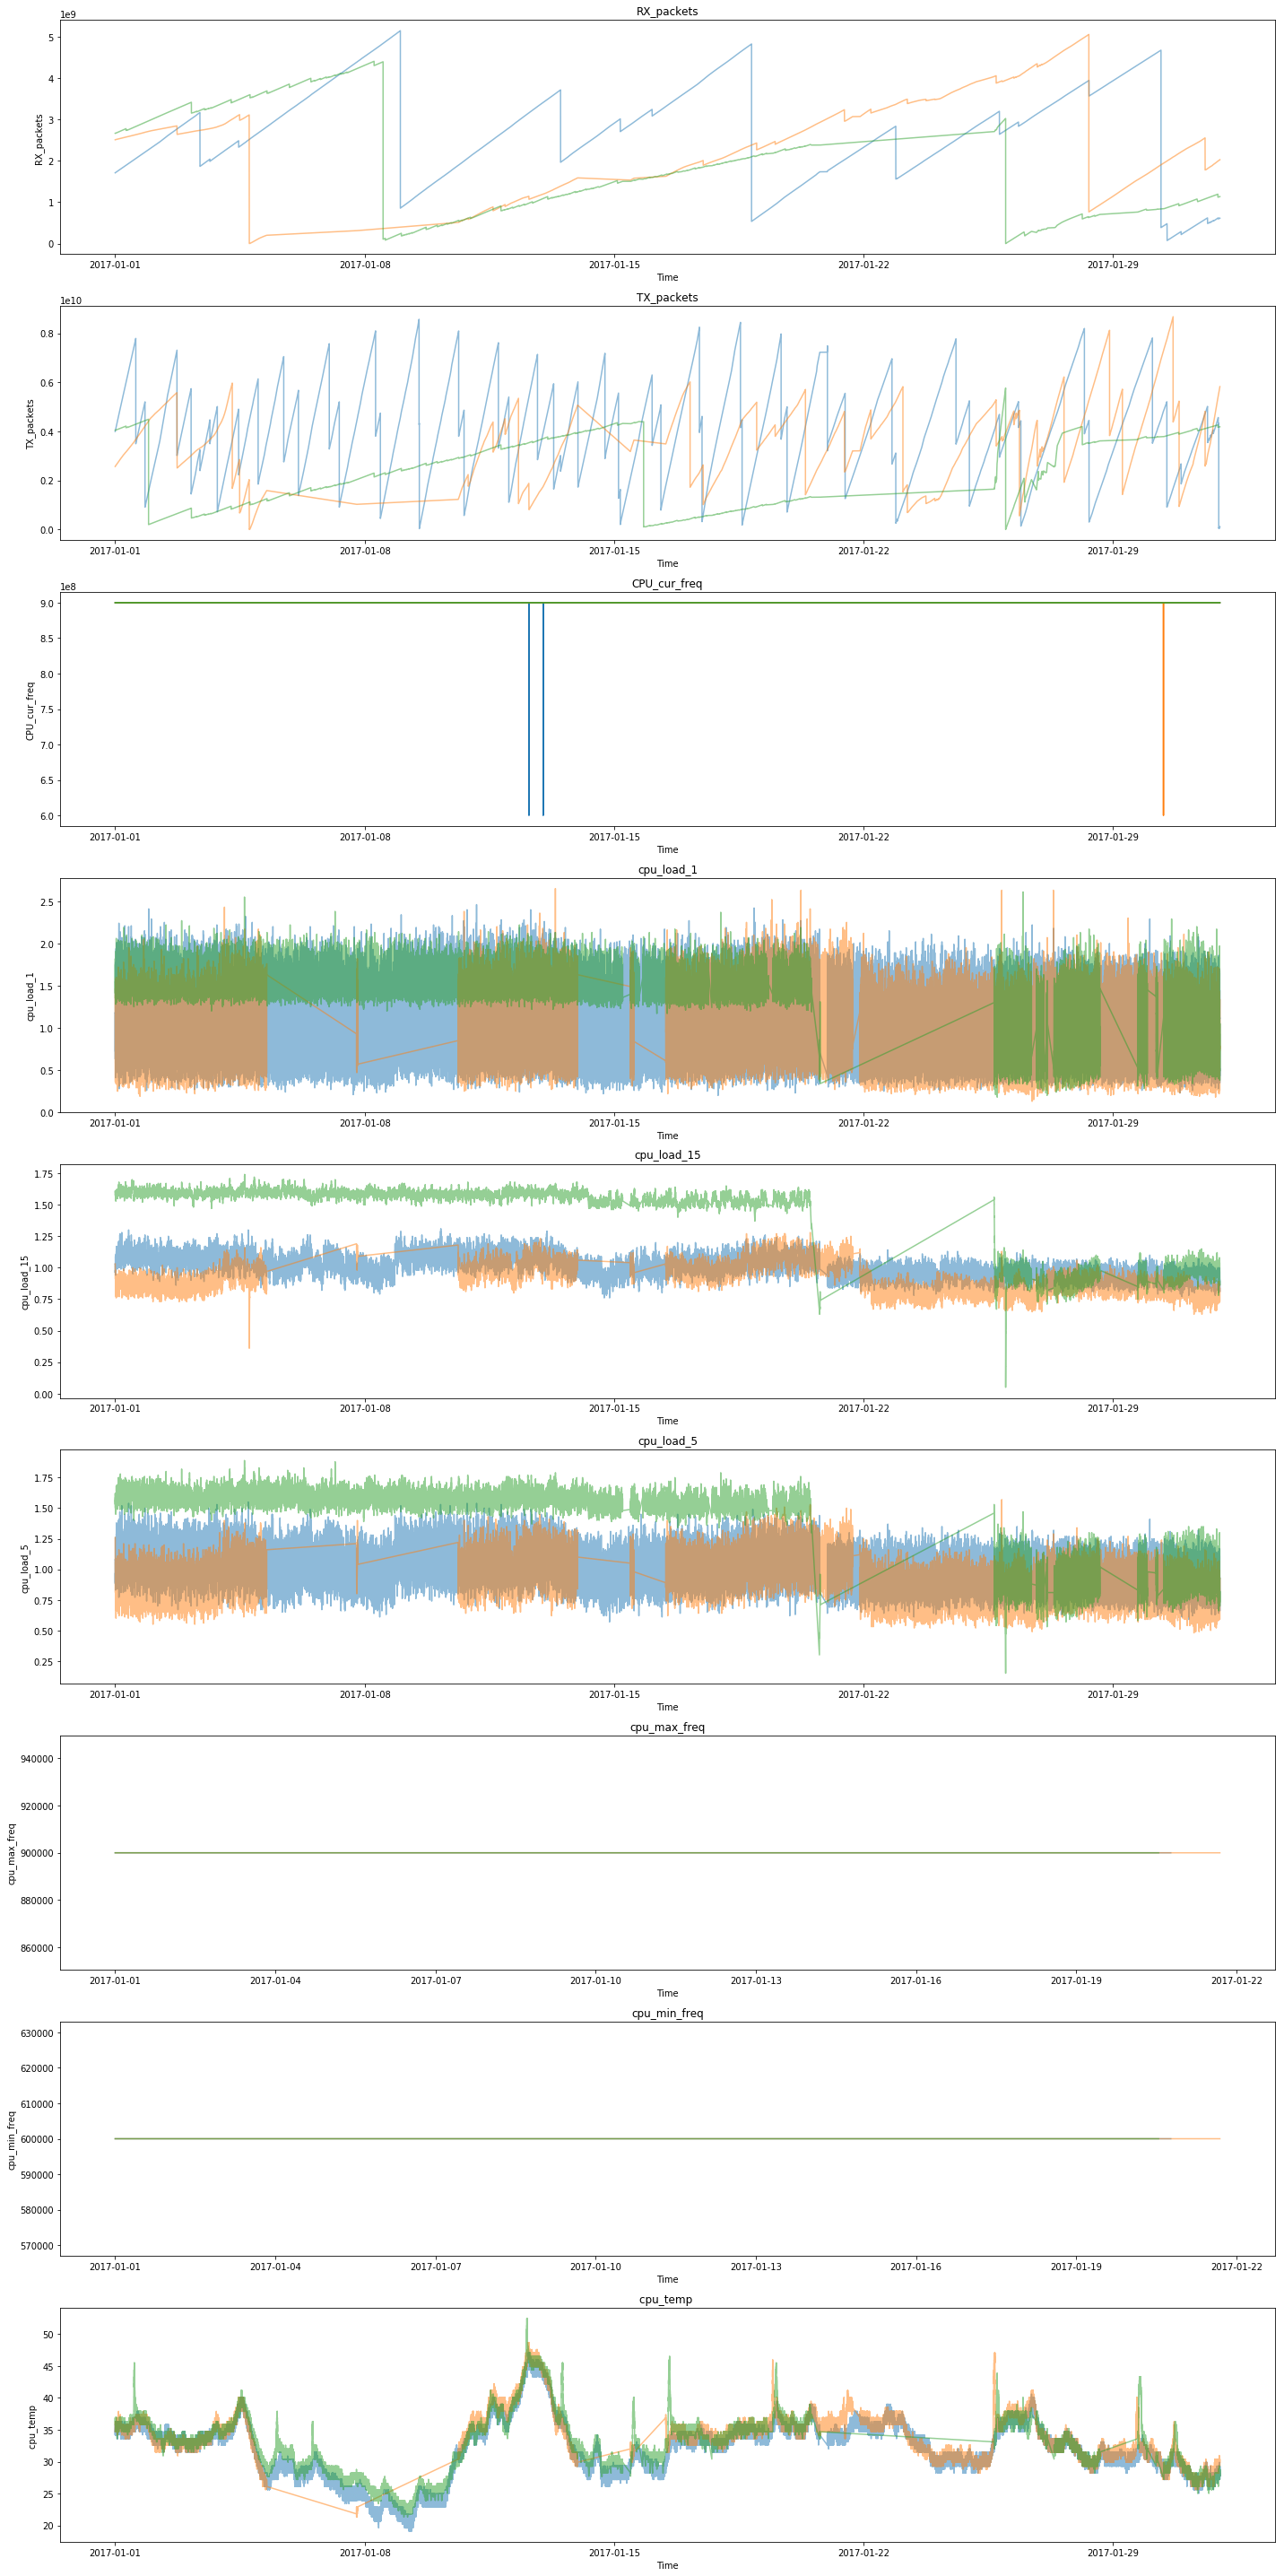

In [127]:
#Now to plot all the variables
#Set total figure size
pl.figure(figsize=(20,40))

###############################################################################

# Plot RX_packets
pl.subplot(911) # Plot 1
pl.plot(good.time,good.RX_packets,alpha=0.5)
pl.plot(bad.time,bad.RX_packets,alpha=0.5)
pl.plot(ugly.time,ugly.RX_packets,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("RX_packets")
pl.title("RX_packets")

###############################################################################

# Plot TX_packets
pl.subplot(912) # Plot 1
pl.plot(good.time,good.TX_packets,alpha=0.5)
pl.plot(bad.time,bad.TX_packets,alpha=0.5)
pl.plot(ugly.time,ugly.TX_packets,alpha=0.5)


# Format Plot
pl.xlabel("Time")
pl.ylabel("TX_packets")
pl.title("TX_packets")

###############################################################################

# Plot CPU_cur_freq
pl.subplot(913) # Plot 1
pl.plot(good.time,good.cpu_cur_freq)
pl.plot(bad.time,bad.cpu_cur_freq)
pl.plot(ugly.time,ugly.cpu_cur_freq)

# Format Plot
pl.xlabel("Time")
pl.ylabel("CPU_cur_freq")
pl.title("CPU_cur_freq")

###############################################################################

# Plot cpu_load_1
pl.subplot(914) # Plot 1
pl.plot(good.time,good.cpu_load_1,alpha=0.5)
pl.plot(bad.time,bad.cpu_load_1,alpha=0.5)
pl.plot(ugly.time,ugly.cpu_load_1,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_load_1")
pl.title("cpu_load_1")

###############################################################################

# Plot cpu_load_15
pl.subplot(915) # Plot 1
pl.plot(good.time,good.cpu_load_15,alpha=0.5)
pl.plot(bad.time,bad.cpu_load_15,alpha=0.5)
pl.plot(ugly.time,ugly.cpu_load_15,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_load_15")
pl.title("cpu_load_15")

###############################################################################

# Plot cpu_load_5
pl.subplot(916) # Plot 1
pl.plot(good.time,good.cpu_load_5,alpha=0.5)
pl.plot(bad.time,bad.cpu_load_5,alpha=0.5)
pl.plot(ugly.time,ugly.cpu_load_5,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_load_5")
pl.title("cpu_load_5")

###############################################################################

# Plot cpu_max_freq
pl.subplot(917) # Plot 1
pl.plot(good.time,good.cpu_max_freq,alpha=0.5)
pl.plot(bad.time,bad.cpu_max_freq,alpha=0.5)
pl.plot(ugly.time,ugly.cpu_max_freq,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_max_freq")
pl.title("cpu_max_freq")

###############################################################################

# Plot cpu_min_freq
pl.subplot(918) # Plot 1
pl.plot(good.time,good.cpu_min_freq,alpha=0.5)
pl.plot(bad.time,bad.cpu_min_freq,alpha=0.5)
pl.plot(ugly.time,ugly.cpu_min_freq,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_min_freq")
pl.title("cpu_min_freq")

###############################################################################

# Plot cpu_temp 
pl.subplot(919) # Plot 1
pl.plot(good.time,good.cpu_temp,alpha=0.5)
pl.plot(bad.time,bad.cpu_temp,alpha=0.5)
pl.plot(ugly.time,ugly.cpu_temp,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_temp ")
pl.title("cpu_temp ")



pl.tight_layout()

In [ ]:
#Set total figure size
pl.figure(figsize=(20,40))

###############################################################################

# Plot laeq
pl.subplot(911) # Plot 1
pl.plot(good.time,good.laeq,alpha=0.5)
pl.plot(bad.time,bad.laeq,alpha=0.5)
pl.plot(ugly.time,ugly.laeq,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("laeq")
pl.title("laeq")

###############################################################################

# Plot lceq
pl.subplot(912) # Plot 1
pl.plot(good.time,good.lceq,alpha=0.5)
pl.plot(bad.time,bad.lceq,alpha=0.5)
pl.plot(ugly.time,ugly.lceq,alpha=0.5)


# Format Plot
pl.xlabel("Time")
pl.ylabel("lceq")
pl.title("lceq")

###############################################################################

# Plot lzeq
pl.subplot(913) # Plot 1
pl.plot(good.time,good.lzeq,alpha=0.5)
pl.plot(bad.time,bad.lzeq,alpha=0.5)
pl.plot(ugly.time,ugly.lzeq,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("lzeq")
pl.title("lzeq")

###############################################################################

# Plot mem_available
pl.subplot(914) # Plot 1
pl.plot(good.time,good.mem_available,alpha=0.5)
pl.plot(bad.time,bad.mem_available,alpha=0.5)
pl.plot(ugly.time,ugly.mem_available,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("mem_available")
pl.title("mem_available")

###############################################################################

# Plot mem_percent
pl.subplot(915) # Plot 1
pl.plot(good.time,good.mem_percent,alpha=0.5)
pl.plot(bad.time,bad.mem_percent,alpha=0.5)
pl.plot(ugly.time,ugly.mem_percent,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("mem_percent")
pl.title("mem_percent")

###############################################################################

# Plot mem_total
pl.subplot(916) # Plot 1
pl.plot(good.time,good.mem_total,alpha=0.5)
pl.plot(bad.time,bad.mem_total,alpha=0.5)
pl.plot(ugly.time,ugly.mem_total,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("mem_total")
pl.title("mem_total")

###############################################################################

# Plot mem_used
pl.subplot(917) # Plot 1
pl.plot(good.time,good.mem_used,alpha=0.5)
pl.plot(bad.time,bad.mem_used,alpha=0.5)
pl.plot(ugly.time,ugly.mem_used,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("mem_used")
pl.title("mem_used")

###############################################################################

# Plot music_usage
pl.subplot(918) # Plot 1
pl.plot(good.time,good.music_usage,alpha=0.5)
pl.plot(bad.time,bad.music_usage,alpha=0.5)
pl.plot(ugly.time,ugly.music_usage,alpha=0.5)

# Format Plot
pl.xlabel("Time")
pl.ylabel("music_usage")
pl.title("music_usage")
pl.ylim(0,10)

pl.tight_layout()

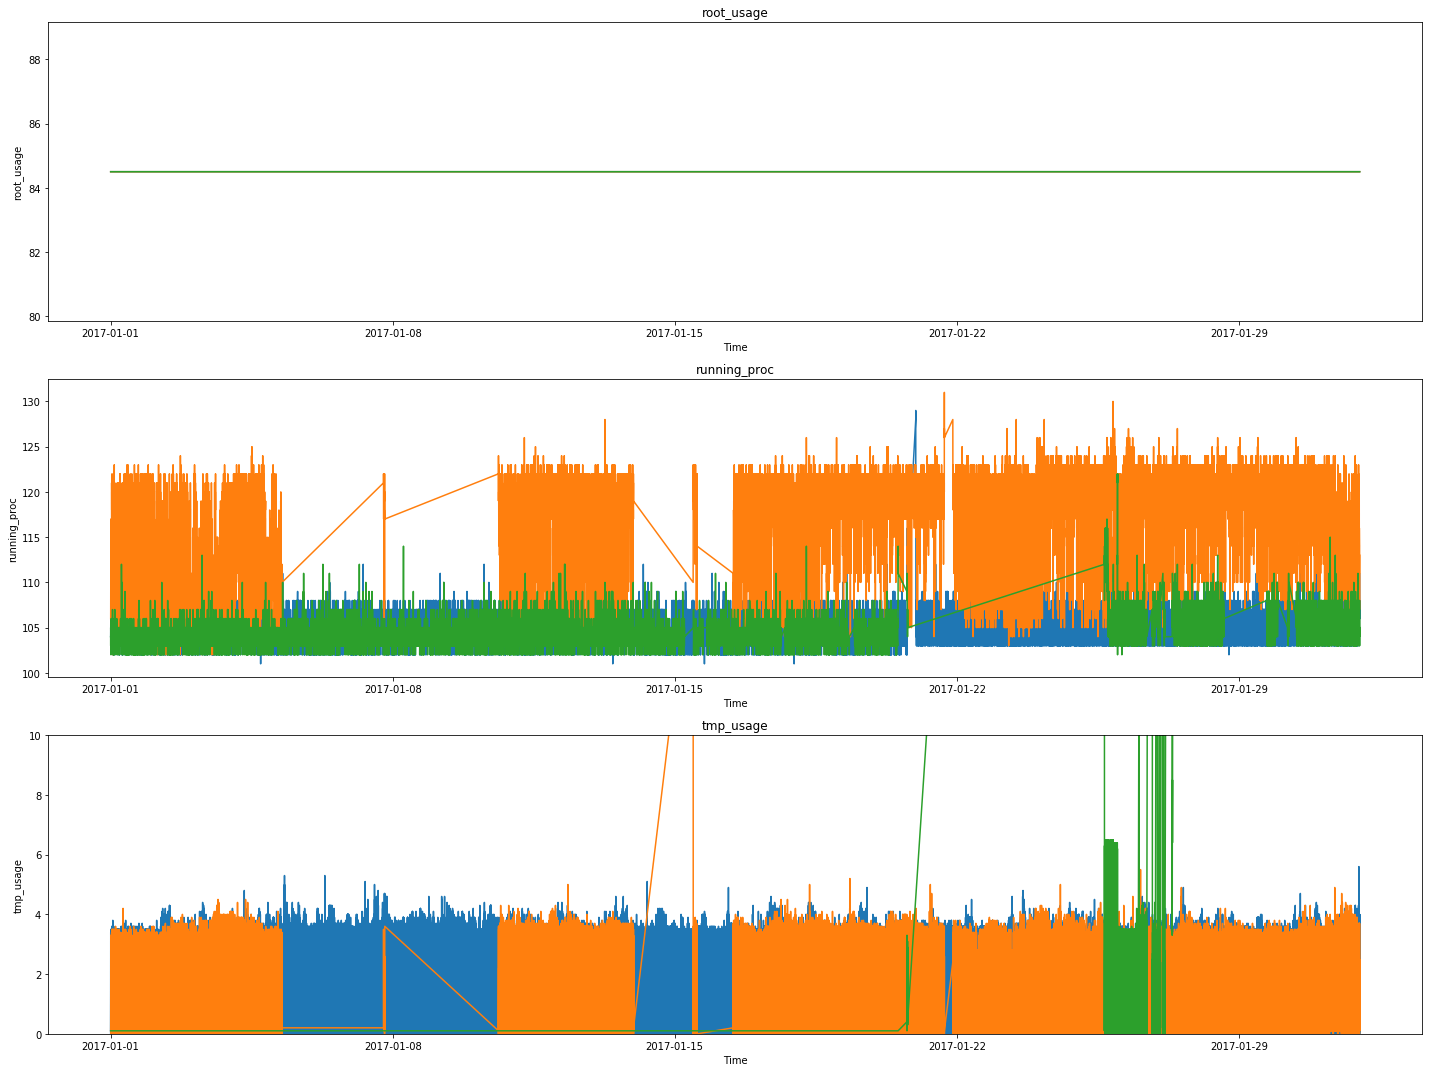

In [131]:
#Set total figure size
pl.figure(figsize=(20,15))

###############################################################################

# Plot root_usage
pl.subplot(311)
pl.plot(good.time,good.root_usage)
pl.plot(good.time,good.root_usage)
pl.plot(good.time,good.root_usage)

# Format Plot
pl.xlabel("Time")
pl.ylabel("root_usage")
pl.title("root_usage")

###############################################################################

# Plot running_proc
pl.subplot(312)
pl.plot(good.time,good.running_proc)
pl.plot(bad.time,bad.running_proc)
pl.plot(ugly.time,ugly.running_proc)

# Format Plot
pl.xlabel("Time")
pl.ylabel("running_proc")
pl.title("running_proc")

###############################################################################

# Plot tmp_usage
pl.subplot(313)
pl.plot(good.time,good.tmp_usage)
pl.plot(bad.time,bad.tmp_usage)
pl.plot(ugly.time,ugly.tmp_usage)

# Format Plot
pl.xlabel("Time")
pl.ylabel("tmp_usage")
pl.title("tmp_usage")
pl.ylim(0,10)


pl.tight_layout()

In [82]:
good.dtypes


Unnamed: 0                   int64
AP                          object
RX_packets                   int64
TX_packets                   int64
branch                     float64
commit_date                float64
commits                     object
cpu_cur_freq                 int64
cpu_load_1                 float64
cpu_load_15                float64
cpu_load_5                 float64
cpu_max_freq               float64
cpu_min_freq               float64
cpu_temp                   float64
disk_part                   object
eth0_mac                    object
fqdn                        object
ingestion_server            object
laeq                       float64
lceq                       float64
level_time                  object
lzeq                       float64
mem_available                int64
mem_percent                float64
mem_total                    int64
mem_used                     int64
music_usage                float64
nodeid                      object
position            

# We need to extract the coordinates for this unit

In [97]:
position = good.position[0]
listpos = position.split("'")
lon = listpos[3]
lat = listpos[7]
print('The coordinates are (',lon,',',lat,')')

The coordinates are ( -73.994374 , 40.729514 )


# Let's do some data cleaning
### Remove columns we do not need

In [25]:
good.columns

Index(['Unnamed: 0', 'AP', 'RX_packets', 'TX_packets', 'branch', 'commit_date',
       'commits', 'cpu_cur_freq', 'cpu_load_1', 'cpu_load_15', 'cpu_load_5',
       'cpu_max_freq', 'cpu_min_freq', 'cpu_temp', 'disk_part', 'eth0_mac',
       'fqdn', 'ingestion_server', 'laeq', 'lceq', 'level_time', 'lzeq',
       'mem_available', 'mem_percent', 'mem_total', 'mem_used', 'music_usage',
       'nodeid', 'position', 'root_usage', 'running_proc', 'time', 'tmp_usage',
       'tun0_ip', 'usb_dev', 'wlan0_ip', 'wlan0_mac'],
      dtype='object')

In [71]:
###############################################################################
good.drop({'Unnamed: 0','AP', 'branch', 'commit_date','commits', 'disk_part', 
           'eth0_mac','fqdn', 'ingestion_server', 'level_time', 'nodeid', 
           'position','usb_dev', 'wlan0_mac'},axis=1,inplace=True)

In [72]:
good.columns

Index(['RX_packets', 'TX_packets', 'cpu_cur_freq', 'cpu_load_1', 'cpu_load_15',
       'cpu_load_5', 'cpu_max_freq', 'cpu_min_freq', 'cpu_temp', 'laeq',
       'lceq', 'lzeq', 'mem_available', 'mem_percent', 'mem_total', 'mem_used',
       'music_usage', 'root_usage', 'running_proc', 'time', 'tmp_usage',
       'tun0_ip', 'wlan0_ip'],
      dtype='object')